##**Section 1.1: Data Preparation and Model Definition**

This code loads the Iris dataset and converts the labels into a format that the neural network can understand. It then splits the data into three parts: training(70%), validation(10%), and testing(20%). Finally, it scales the feature values between 0 and 1 to help the model learn better and faster.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical


iris = load_iris()  # Load the Iris dataset
X = iris.data  # Features (flower measurements)
y = to_categorical(iris.target)  # One-hot encode target labels

# Split data into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(  # 80% train+val, 20% test
    X, y, test_size=0.2, random_state=42, stratify=iris.target  # Maintain class distribution
)

# Further split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(  # Split train+val into 70% train, 10% val
    X_train_val, y_train_val, test_size=0.125, random_state=42,  # Stratify to maintain balance
    stratify=np.argmax(y_train_val, axis=1)  # Ensure even class distribution
)

# Scale features between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Scale training data
X_val = scaler.transform(X_val)  # Scale validation data
X_test = scaler.transform(X_test)  # Scale test data

print("Data prepared and split into training, validation, and test sets.")


Data prepared and split into training, validation, and test sets.


##**Section 1.2: Define and Train the MLP Model**



*1. Setting up the basic tools needed to build and train a neural network using **TensorFlow**. It also defines key settings like how fast the model should learn (learning rate), how many times it should go through the data (epochs), and how many neurons should be in the hidden layer (hidden_units). Additionally, it prepares the activation functions that help the model learn patterns and make predictions.*

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import wandb

# Define hyperparameters and configuration settings
config = {
    "learning_rate": 0.001,  # Speed of learning during training
    "batch_size": 32,  # No of samples processed at a time
    "epochs": 50,  # No of times data is passed through the model
    "hidden_units": 16,  # No of neurons in the hidden layer
    "activation_hidden": "relu",  # Activation function for the hidden layer
    "activation_output": "softmax"  # Activation function for the output layer
}


*2. Setting up the neural network for training and connects it to Weights & Biases (W&B) for tracking progress. The model has two layers: a hidden layer with 16 neurons that help the model learn patterns and an output layer with 3 neurons for predicting flower species. The model is then compiled with an Adam optimizer for efficient learning and a categorical cross-entropy loss function to handle multi-class classification.*

In [24]:
# Initialize Weights & Biases for tracking
wandb.init(project="iris_mlp", config=config, anonymous="allow")  # Start W&B run with configuration

model = Sequential([
    Dense(16, input_shape=(4,), activation='relu'),  # Hidden layer with 16 neurons and ReLU activation
    Dense(3, activation='softmax')  # Output layer with 3 neurons and softmax activation for classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss='categorical_crossentropy',      # Loss function for multi-class classification
    metrics=['accuracy']                  # Track accuracy during training
)



<IPython.core.display.Javascript object>

wandb: (1) Private W&B dashboard, no account required
wandb: (2) Use an existing W&B account


wandb: Enter your choice: 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tanishwanve (tanishwanve-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


*3. This code sets up a custom function that logs the model's training and validation loss to Weights & Biases (W&B) after each epoch. This helps monitor how well the model is learning during training. The model is then trained using the training data, and after every epoch, the loss values are recorded. This helps in tracking the model's progress over time and identifying if it's learning effectively or overfitting.*

In [25]:
import tensorflow as tf

#Train the model without using Weights and Biases

history = model.fit(
    X_train, y_train,  # Training dataset
    validation_data=(X_val, y_val),  # Validation dataset for monitoring during training
    batch_size=config["batch_size"],  # No of samples processed at a time
    epochs=config["epochs"],  # Total no of epochs to train
    callbacks=[CustomWandbCallback()],  # Use custom callback for logging
    verbose=1  # Display progress during training
)


Epoch 1/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step - accuracy: 0.3438 - loss: 1.0408

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.3344 - loss: 1.0335 - val_accuracy: 0.3333 - val_loss: 1.0084
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3271 - loss: 1.0210 - val_accuracy: 0.3333 - val_loss: 1.0013
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3521 - loss: 0.9997 - val_accuracy: 0.3333 - val_loss: 0.9942
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3628 - loss: 0.9904 - val_accuracy: 0.3333 - val_loss: 0.9872
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3614 - loss: 0.9912 - val_accuracy: 0.4000 - val_loss: 0.9808
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4135 - loss: 0.9841 - val_accuracy: 0.4000 - val_loss: 0.9745
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3940 - loss: 0.9883 - val_accuracy: 0.4000 - val_loss: 0.9681
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4356 - loss: 0.9808 - val_accuracy: 0.4000 - val_loss: 0.9618
Epoch 9/50


##**Section 1.3:  Evaluate Model Performance**




*1. Evaluates how well the trained model performs on the test data. It starts by predicting the probabilities for each class and then converts those probabilities into final class labels. The true class labels are also converted from one-hot encoded format to regular class labels. The model's performance is then measured using four metrics: accuracy (overall correctness), precision (how many predicted positives are correct), recall (how many actual positives were found), and F1-score (a balance between precision and recall). Finally, the results of these metrics are printed out for review.*

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_pred_prob = model.predict(X_test)  # Predict probabilities for each class
y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Get class with highest probability
y_test_true = np.argmax(y_test, axis=1)  # Convert true labels from one-hot encoding

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_true, y_test_pred)  # Measure overall correctness
precision = precision_score(y_test_true, y_test_pred, average='weighted')  # Measure exactness
recall = recall_score(y_test_true, y_test_pred, average='weighted')  # Measure completeness
f1 = f1_score(y_test_true, y_test_pred, average='weighted')  # Balance between precision and recall

# Print the results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test Accuracy: 0.7667
Test Precision: 0.8627
Test Recall: 0.7667
Test F1 Score: 0.7341


*2. Logs the final evaluation metrics to Weights & Biases (W&B). After testing the model, it records the results for accuracy, precision, recall, and F1-score. These metrics will appear on your W&B dashboard, allowing you to easily track and analyze your model’s performance after training.*

In [45]:
# Log evaluation metrics to Weights & Biases (W&B)
wandb.log({
    "test_accuracy": accuracy,  # Log test accuracy
    "test_precision": precision,  # Log test precision
    "test_recall": recall,  # Log test recall
    "test_f1_score": f1  # Log test F1-score
})


*3. Creating two visualizations to evaluate the model's performance.First, it plots the training and validation loss curves to track how well the model learned over time and if there were any signs of overfitting. Then, it generates a confusion matrix to show how many predictions were correct or incorrect for each class, making it easy to spot where the model is struggling.Both visualizations are also logged to **Weights & Biases (W&B)** for easy tracking and analysis.*

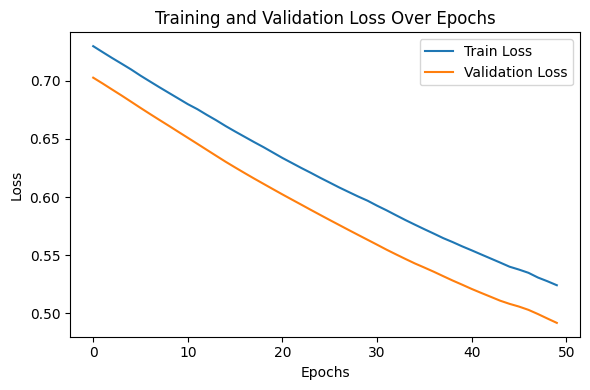

In [46]:
# Plot training and validation loss curves using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# Log the loss curve visualization to W&B
wandb.log({"Loss Curves": wandb.Image(plt)})

# Display the loss curves
plt.show()


*The loss curve shows a steady decrease in both training and validation loss over the epochs, indicating that the model is learning effectively and there are no signs of overfitting since both losses follow a similar pattern.*

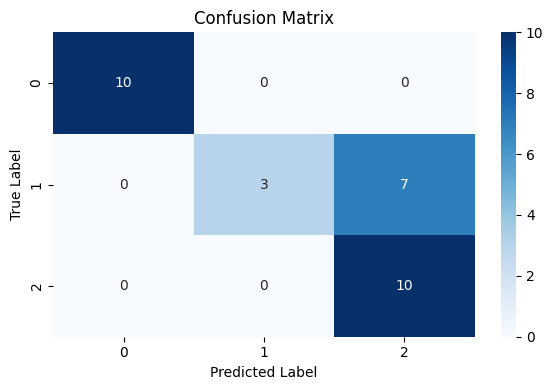

In [47]:
# Generate and plot confusion matrix using Seaborn
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Log the confusion matrix visualization to W&B
wandb.log({"Confusion Matrix": wandb.Image(plt)})

# Display the confusion matrix
plt.show()

*The confusion matrix reveals a major issue: the model predicts only one class (label 1) for all instances. Despite the decreasing loss, the model has failed to distinguish between the three classes, suggesting that it is either underfitting or stuck in a local minimum where it predicts only the dominant class.*

##**Section 1.4: Set Up Experiment Tracking with Weights & Biases (W&B)**



*This code logs the model's architecture to Weights & Biases (W&B), making it easier to review later. It then sets up a custom callback that automatically tracks the model’s training and validation loss and accuracy after each epoch. The model is then trained using the provided data, and after every epoch, the performance metrics are logged. This helps monitor the model's learning progress and identify any potential issues early on.*

In [48]:
# Import io module to capture model summary as a string
import io

# Log model architecture to Weights & Biases (W&B)
stream = io.StringIO()  # Create a string buffer to store the summary
model.summary(print_fn=lambda x: stream.write(x + "\n"))  # Capture model summary line by line
model_summary_str = stream.getvalue()  # Get the full model summary as a string
wandb.log({"Model Architecture": model_summary_str})  # Log the model structure to W&B for tracking

# Define a custom callback to log loss and accuracy after each epoch
class CustomWandbCallback(tf.keras.callbacks.Callback):  # Create a custom callback class
    def on_epoch_end(self, epoch, logs=None):  # Called at the end of each epoch
        wandb.log({  # Log the following metrics to W&B:
            "epoch": epoch,  # Current epoch number
            "train_loss": logs.get("loss"),  # Training loss for this epoch
            "val_loss": logs.get("val_loss"),  # Validation loss for this epoch
            "train_accuracy": logs.get("accuracy"),  # Training accuracy
            "val_accuracy": logs.get("val_accuracy")  # Validation accuracy
        })

# Train the model while tracking progress
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Validation dataset to check model performance during training
    batch_size=config["batch_size"],  # No of samples processed before updating weights
    epochs=config["epochs"],  # Total no of complete passes through the dataset
    callbacks=[CustomWandbCallback()],
    verbose=1  # Display progress after each epoch
)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8061 - loss: 0.5198 - val_accuracy: 0.8667 - val_loss: 0.4883
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8040 - loss: 0.4964 - val_accuracy: 0.8667 - val_loss: 0.4852
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8030 - loss: 0.5139 - val_accuracy: 0.8667 - val_loss: 0.4824
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8019 - loss: 0.5154 - val_accuracy: 0.8667 - val_loss: 0.4794
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7696 - loss: 0.5314 - val_accuracy: 0.8667 - val_loss: 0.4766
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8450 - loss: 0.4930 - val_accuracy: 0.8667 - val_loss: 0.4736
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8252 - loss: 0.5017 - val_accuracy: 0.8667 - val_loss: 0.4706
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8179 - loss: 0.5094 - val_accuracy: 0.8667 - val_loss: 0.4675


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test Accuracy: 0.9000
Test Precision: 0.9231
Test Recall: 0.9000
Test F1 Score: 0.8977


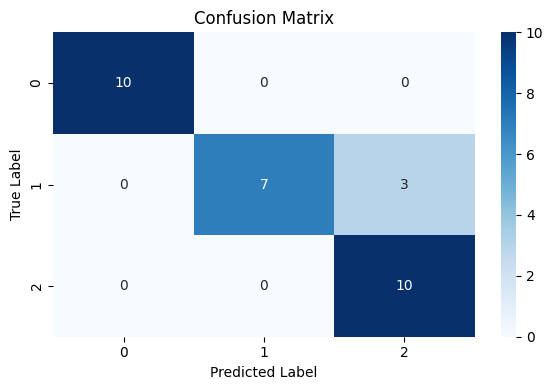

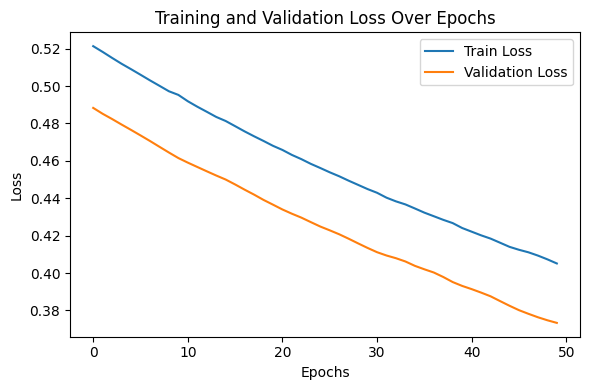

In [49]:
# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_true, y_test_pred)
precision = precision_score(y_test_true, y_test_pred, average='weighted')
recall = recall_score(y_test_true, y_test_pred, average='weighted')
f1 = f1_score(y_test_true, y_test_pred, average='weighted')

# Print and log evaluation results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Log final evaluation metrics to W&B
wandb.log({
    "Test Accuracy": accuracy,
    "Test Precision": precision,
    "Test Recall": recall,
    "Test F1 Score": f1
})

# Generate and visualize confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.show()

# Plot and log training and validation loss curves
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
wandb.log({"Loss Curves": wandb.Image(plt)})
plt.show()


#**SECTION 2**

#**Hyperparameter Optimization**

##**Data Preparation**

*Importing Libraries*

In [71]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

*Loads the Iris dataset and splits it into training (70%), validation (10%), and testing (20%) sets, then scales the features between 0 and 1. Finally, it converts the integer labels into one-hot encoded vectors so the model can use them for multi-class classification.*

In [72]:
# Load the Iris dataset
iris = load_iris()  # Load dataset
X = iris.data  # Feature matrix
y = iris.target  # Integer labels (0, 1, or 2)

# Split data into train+val (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split train+val into train (70% total) and validation (10% total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.125, random_state=42, stratify=y_train_val
)

# Scale features to [0, 1]
scaler = MinMaxScaler()  # Initialize scaler
X_train = scaler.fit_transform(X_train)  # Scale training data
X_val = scaler.transform(X_val)  # Scale validation data
X_test = scaler.transform(X_test)  # Scale test data

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)  # Convert training labels
y_val = to_categorical(y_val, num_classes=3)      # Convert validation labels
y_test = to_categorical(y_test, num_classes=3)    # Convert test labels

##**Model Function**

*This code defines a function called create_model that builds a simple neural network (MLP). It creates a sequential model with one hidden layer of 16 neurons using ReLU activation and an output layer of 3 neurons using softmax activation for multi-class classification. The model is compiled with the Adam optimizer and categorical crossentropy loss, and accuracy is tracked during training. The function takes a learning rate as input and returns the compiled model.*

In [69]:
from tensorflow.keras.models import Sequential  # For building a sequential model
from tensorflow.keras.layers import Dense       # For adding Dense layers
from tensorflow.keras.optimizers import Adam      # For the Adam optimizer

def create_model(lr):
    model = Sequential([                          # Initialize sequential model
        Dense(16, input_shape=(4,), activation='relu'),  # Hidden layer: 16 neurons, ReLU activation
        Dense(3, activation='softmax')                   # Output layer: 3 neurons, softmax activation
    ])
    model.compile(optimizer=Adam(learning_rate=lr),  # Compile model with Adam optimizer
                  loss='categorical_crossentropy',   # Use categorical crossentropy loss
                  metrics=['accuracy'])              # Track accuracy during training
    return model

##**Hyperparameter loop and grid**

*This code loads the Iris dataset, splits it into training, validation, and test sets, and scales the features to a range of [0,1]. It then converts the integer class labels into one-hot encoded labels, preparing the data for a neural network model.*

In [73]:
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For heatmaps
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix  # For evaluation metrics

# Define hyperparameter grid
batch_sizes = [2, 4]             # Batch sizes to try
learning_rates = [1e-3, 1e-5]      # Learning rates to try
epochs_list = [1, 3, 5]            # Epochs to try

# List to store results for each configuration
results = []  # Initialize results list

Training with batch size=2, learning rate=0.001, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Test Accuracy: 0.3333, Test F1 Score: 0.2222


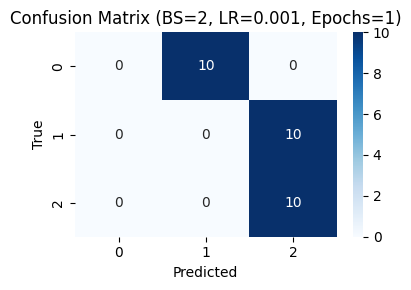

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 1, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 2, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 1, True: 0
--------------------------------------------------
Training with batch size=2, learning rate=0.001, epochs=3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Test Accuracy: 0.6667, Test F1 Score: 0.5556


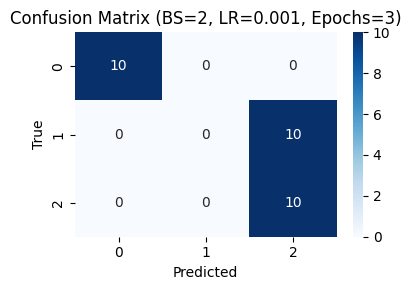

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 0, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 2, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 0, True: 0
--------------------------------------------------
Training with batch size=2, learning rate=0.001, epochs=5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Test Accuracy: 0.7333, Test F1 Score: 0.7070


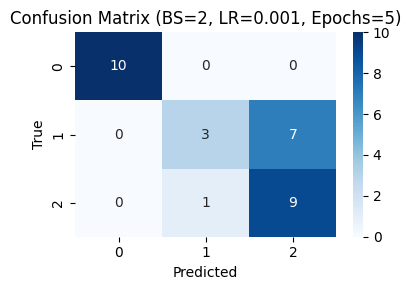

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 0, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 2, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 0, True: 0
--------------------------------------------------
Training with batch size=2, learning rate=1e-05, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Test Accuracy: 0.1000, Test F1 Score: 0.0606


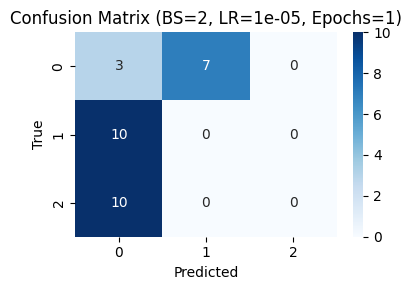

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 0, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 0, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 0, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 0, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 0, True: 0
--------------------------------------------------
Training with batch size=2, learning rate=1e-05, epochs=3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Test Accuracy: 0.1333, Test F1 Score: 0.0784


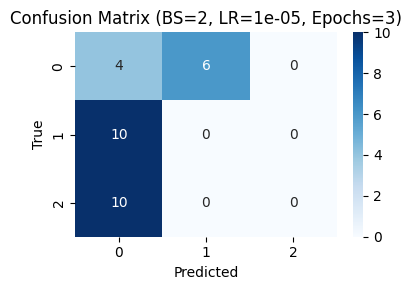

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 1, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 0, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 0, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 0, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 1, True: 0
--------------------------------------------------
Training with batch size=2, learning rate=1e-05, epochs=5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Test Accuracy: 0.5667, Test F1 Score: 0.5062


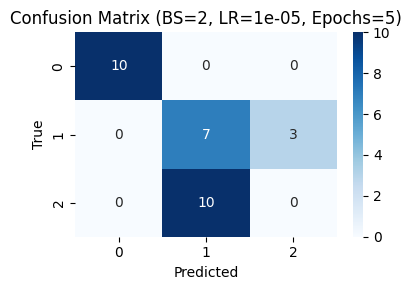

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 0, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 1, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 0, True: 0
--------------------------------------------------
Training with batch size=4, learning rate=0.001, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Test Accuracy: 0.5333, Test F1 Score: 0.5185


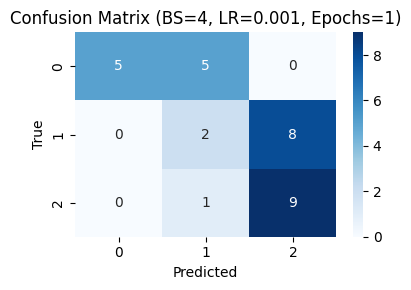

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 0, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 2, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 0, True: 0
--------------------------------------------------
Training with batch size=4, learning rate=0.001, epochs=3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Test Accuracy: 0.3000, Test F1 Score: 0.1538


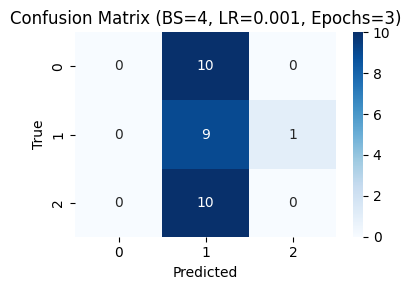

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 1, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 1, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 1, True: 0
--------------------------------------------------
Training with batch size=4, learning rate=0.001, epochs=5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Test Accuracy: 0.3333, Test F1 Score: 0.1754


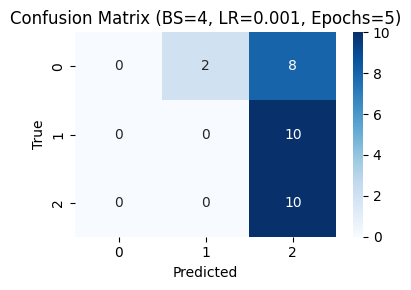

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 1, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 2, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 1, True: 0
--------------------------------------------------
Training with batch size=4, learning rate=1e-05, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Test Accuracy: 0.3333, Test F1 Score: 0.1667


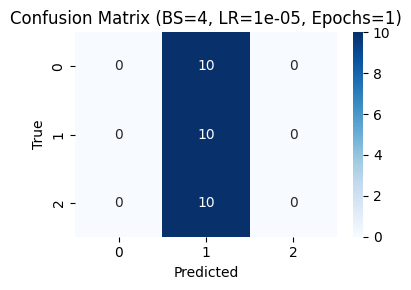

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 1, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 1, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 1, True: 0
--------------------------------------------------
Training with batch size=4, learning rate=1e-05, epochs=3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Test Accuracy: 0.3333, Test F1 Score: 0.1667


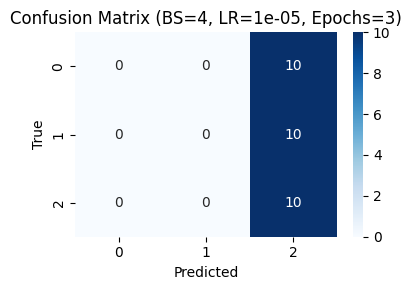

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 2, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 2, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 2, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 2, True: 0
--------------------------------------------------
Training with batch size=4, learning rate=1e-05, epochs=5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Test Accuracy: 0.3333, Test F1 Score: 0.1667


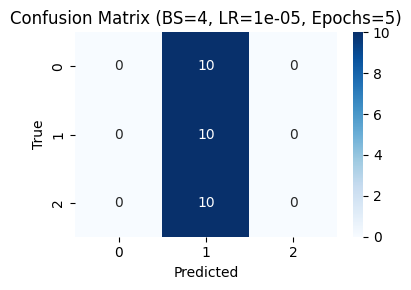

Sample Predictions (Input, Predicted, True):
Input: [0.02777778 0.41666667 0.03448276 0.04166667], Predicted: 1, True: 0
Input: [0.5        0.41666667 0.65517241 0.70833333], Predicted: 1, True: 2
Input: [0.16666667 0.16666667 0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.19444444 0.125      0.37931034 0.375     ], Predicted: 1, True: 1
Input: [0.02777778 0.5        0.03448276 0.04166667], Predicted: 1, True: 0
--------------------------------------------------
Final Results Table:
    batch_size  learning_rate  epochs  accuracy        f1
0            2        0.00100       1  0.333333  0.222222
1            2        0.00100       3  0.666667  0.555556
2            2        0.00100       5  0.733333  0.706960
3            2        0.00001       1  0.100000  0.060606
4            2        0.00001       3  0.133333  0.078431
5            2        0.00001       5  0.566667  0.506173
6            4        0.00100       1  0.533333  0.518519
7            4        0.00100       3  

In [74]:

# Loop through all hyperparameter combinations
for batch in batch_sizes:  # Iterate over each batch size option
    for lr in learning_rates:  # Iterate over each learning rate option
        for ep in epochs_list:  # Iterate over each epoch count option
            print(f"Training with batch size={batch}, learning rate={lr}, epochs={ep}")  # Show current config
            model = create_model(lr)  # Build model with current learning rate

            # Train the model on training data
            history = model.fit(
                X_train, y_train,                 # Use training data
                validation_data=(X_val, y_val),     # Use validation data
                batch_size=batch,                   # Set current batch size
                epochs=ep,                          # Set number of epochs
                verbose=0                           # Silent training output
            )

            # Evaluate the model on test data
            y_test_pred_prob = model.predict(X_test)  # Predict test probabilities
            y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Convert probabilities to class labels
            y_test_true = np.argmax(y_test, axis=1)  # Convert one-hot true labels to integers

            # Calculate evaluation metrics
            acc = accuracy_score(y_test_true, y_test_pred)  # Compute accuracy
            f1_val = f1_score(y_test_true, y_test_pred, average='weighted')  # Compute weighted F1 score
            print(f"Test Accuracy: {acc:.4f}, Test F1 Score: {f1_val:.4f}")  # Print metrics

            # Store the results for later comparison
            results.append({
                'batch_size': batch,       # Save batch size
                'learning_rate': lr,       # Save learning rate
                'epochs': ep,              # Save epoch count
                'accuracy': acc,           # Save accuracy metric
                'f1': f1_val               # Save F1 score metric
            })

            # Plot the confusion matrix for current configuration
            cm = confusion_matrix(y_test_true, y_test_pred)  # Compute confusion matrix
            plt.figure(figsize=(4,3))  # Set plot size
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Plot confusion matrix as heatmap
            plt.title(f"Confusion Matrix (BS={batch}, LR={lr}, Epochs={ep})")  # Title with config info
            plt.xlabel("Predicted")  # Label for x-axis
            plt.ylabel("True")  # Label for y-axis
            plt.tight_layout()  # Adjust layout
            plt.show()  # Display the plot

            # Display sample predictions for 5 test cases
            print("Sample Predictions (Input, Predicted, True):")  # Header message
            for i in range(5):  # Loop over first 5 test samples
                sample_input = X_test[i]  # Get test sample input
                sample_pred = y_test_pred[i]  # Get model prediction for sample
                sample_true = y_test_true[i]  # Get actual label for sample
                print(f"Input: {sample_input}, Predicted: {sample_pred}, True: {sample_true}")  # Print details
            print("-" * 50)  # Print separator line

# Optionally, convert results to a DataFrame for review
import pandas as pd
df_results = pd.DataFrame(results)
print("Final Results Table:")
print(df_results)

##**Automated Hyperparameter Search**

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

*This function builds a simple multi-layer perceptron (MLP) model for classifying data into 3 classes. It creates a model with one hidden layer of 16 neurons and an output layer of 3 neurons, and uses Keras Tuner to choose between two learning rates (1e-3 or 1e-5). The model is compiled with the Adam optimizer and categorical crossentropy loss, and it tracks accuracy during training.*

In [79]:
import keras_tuner as kt  # Import Keras Tuner

def model_builder(hp):
    """
    Builds a simple MLP model with a tunable learning rate.
    """
    model = tf.keras.Sequential([  # Create a sequential model
        tf.keras.layers.Dense(16, input_shape=(4,), activation='relu'),  # Add hidden layer (16 neurons, ReLU)
        tf.keras.layers.Dense(3, activation='softmax')  # Add output layer (3 neurons, softmax)
    ])
    lr = hp.Choice('learning_rate', [1e-3, 1e-5])  # Select learning rate from given options
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Compile with Adam optimizer using selected learning rate
        loss='categorical_crossentropy',  # Use categorical crossentropy loss
        metrics=['accuracy']  # Track accuracy during training
    )
    return model


##**GRID**

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

# Assume X_train, X_val, X_test, y_train, y_val, y_test_oh are already defined from data preparation
# and create_model(lr) is your model builder function.

# Define hyperparameter grid
batch_sizes = [2, 4]            # Batch sizes to try
learning_rates = [1e-3, 1e-5]     # Learning rates to try
epochs_list = [1, 3, 5]           # Epochs to try

# ----------------------------
# Manual Grid Search
# ----------------------------
results_grid = []  # List to store grid search results

for batch in batch_sizes:
    for lr in learning_rates:
        for ep in epochs_list:
            config_name = f"Grid_BS{batch}_LR{lr}_Ep{ep}"
            print(f"Grid: {config_name}")
            model = create_model(lr)  # Build model with current learning rate
            history = model.fit(
                X_train, y_train,                    # Use training data
                validation_data=(X_val, y_val),        # Use validation data
                batch_size=batch,                      # Set current batch size
                epochs=ep,                             # Set number of epochs
                verbose=0                              # Silent training output
            )
            test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)  # Evaluate on test data

            # Compute F1 score
            y_test_pred_prob = model.predict(X_test)
            y_test_pred = np.argmax(y_test_pred_prob, axis=1)
            y_test_true = np.argmax(y_test_oh, axis=1)
            f1_val = f1_score(y_test_true, y_test_pred, average='weighted')

            # Store results for this configuration
            results_grid.append({
                'batch_size': batch,
                'epochs': ep,
                'learning_rate': lr,
                'test_accuracy': test_acc,
                'f1': f1_val,
                'best_config': {'learning_rate': lr, 'tuner/epochs': ep},
                'method': 'Grid'
            })



Grid: Grid_BS2_LR0.001_Ep1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Grid: Grid_BS2_LR0.001_Ep3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Grid: Grid_BS2_LR0.001_Ep5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Grid: Grid_BS2_LR1e-05_Ep1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Grid: Grid_BS2_LR1e-05_Ep3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Grid: Grid_BS2_LR1e-05_Ep5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Grid: Grid_BS4_LR0.001_Ep1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Grid: Grid_BS4_LR0.001_Ep3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Grid: Grid_BS4_LR0.001_Ep5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Grid: Grid_BS4_LR1e-05_Ep1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Grid: Grid_BS4_LR1e-05_Ep3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Grid: Grid_BS4_LR1e-05_Ep5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


##**Random Search Optimization**

Trial 2 Complete [00h 00m 05s]
val_accuracy: 0.20000000298023224

Best val_accuracy So Far: 0.6666666865348816
Total elapsed time: 00h 00m 09s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Random Search (batch_size=4) - Test Accuracy: 0.7000, F1: 0.6238


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


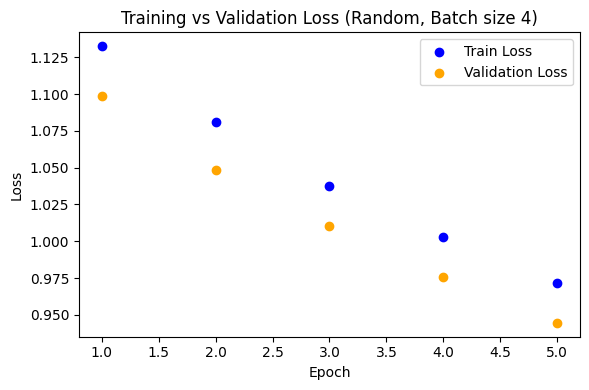


Random Search complete.


In [138]:
import keras_tuner as kt  # Import Keras Tuner for hyperparameter search
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np  # For numerical operations
from sklearn.metrics import f1_score  # For computing F1 score

results_random = []  # Initialize list to store Random Search results

# Loop over the two batch sizes: 2 and 4
for bs in [2, 4]:
    print(f"\n[Random Search] Running with batch size = {bs}")

    # Initialize RandomSearch tuner
    tuner_rand = kt.RandomSearch(
        model_builder,             # Our model builder function
        objective='val_accuracy',  # Optimize for validation accuracy
        max_trials=6,              # Try 6 different hyperparameter combinations
        directory=f'rand_dir_bs_{bs}',  # Directory to save tuning results
        project_name=f'iris_rand_bs_{bs}'  # Project name identifier
    )

    # Run hyperparameter search with the given batch size
    tuner_rand.search(
        X_train, y_train_oh,  # Training data and one-hot encoded labels
        epochs=5,             # Train each trial for 5 epochs
        validation_data=(X_val, y_val_oh),  # Use validation data for evaluation
        batch_size=bs,        # Set current batch size from the loop
        verbose=1             # Show detailed output
    )

    # Retrieve best hyperparameters and the corresponding model
    best_hp_rand = tuner_rand.get_best_hyperparameters(num_trials=1)[0]
    best_model_rand = tuner_rand.get_best_models(num_models=1)[0]
    test_loss, test_acc = best_model_rand.evaluate(X_test, y_test_oh, verbose=0)

    # Compute F1 score manually
    y_test_pred_prob = best_model_rand.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)
    y_test_true = np.argmax(y_test_oh, axis=1)
    f1_val = f1_score(y_test_true, y_test_pred, average='weighted')

    # Store results including F1 score
    results_random.append({
        'batch_size': bs,
        'epochs': 5,  # Using external epoch value (5)
        'test_accuracy': test_acc,
        'f1': f1_val,
        'best_config': best_hp_rand.values,
        'method': 'RandomSearch'
    })
    print(f"Random Search (batch_size={bs}) - Test Accuracy: {test_acc:.4f}, F1: {f1_val:.4f}")

    # Retrain the best model to capture training history for plotting
    best_model_rand_retrained = tuner_rand.hypermodel.build(best_hp_rand)
    history_rand = best_model_rand_retrained.fit(
        X_train, y_train_oh,
        validation_data=(X_val, y_val_oh),
        epochs=5,
        batch_size=bs,
        verbose=0
    )

    # Scatter plot for training vs. validation loss over epochs
    epochs_range = range(1, 6)  # Define epochs 1 through 5
    plt.figure(figsize=(6, 4))
    plt.scatter(list(epochs_range), history_rand.history['loss'], label='Train Loss', color='blue')
    plt.scatter(list(epochs_range), history_rand.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f"Training vs Validation Loss (Random, Batch size {bs})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\nRandom Search complete.")


###**HYPERBAND**

*This code extends your hyperparameter search by computing the F1 score along with test accuracy for each configuration. After training each model with a specific batch size, learning rate, and epoch count, it evaluates the model on the test set and uses scikit-learn’s f1_score to compute the weighted F1 score. The results (batch size, test accuracy, F1, and best configuration) are then stored in a list and later converted into a DataFrame for easy comparison. This allows you to compare how different hyperparameter combinations affect both accuracy and the balance between precision and recall (F1).*


[Hyperband] Running with batch size = 2
Reloading Tuner from kt_dir_bs_2/iris_tuner_bs_2/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Batch size 2: Test Accuracy = 0.4000, F1 = 0.3419


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


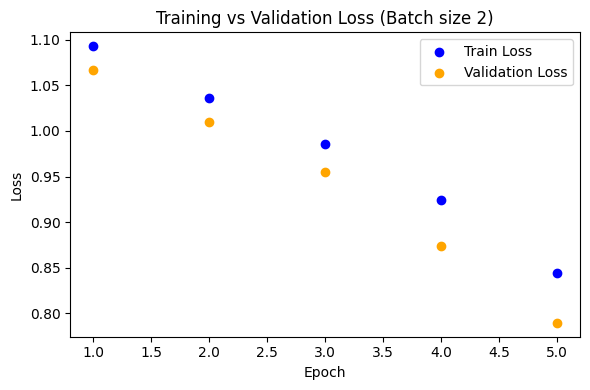


[Hyperband] Running with batch size = 4
Reloading Tuner from kt_dir_bs_4/iris_tuner_bs_4/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Batch size 4: Test Accuracy = 0.5667, F1 = 0.4627


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


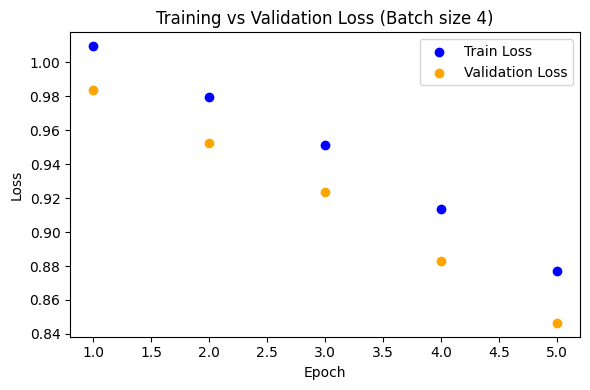


Hyperband search complete.

Comparison Table:
Empty DataFrame
Columns: []
Index: []


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score

results = []  # Initialize a list to store results from each batch size

# Loop through hyperparameter combinations for batch sizes 2 and 4
for bs in [2, 4]:
    print(f"\n[Hyperband] Running with batch size = {bs}")

    # Initialize Hyperband tuner with our model builder
    tuner = kt.Hyperband(
        model_builder,
        objective='val_accuracy',  # Optimize for validation accuracy
        max_epochs=5,
        factor=3,
        directory=f'kt_dir_bs_{bs}',
        project_name=f'iris_tuner_bs_{bs}'
    )

    # Run hyperparameter search with current batch size
    tuner.search(
        X_train, y_train_oh,
        epochs=5,
        validation_data=(X_val, y_val_oh),
        batch_size=bs,
        verbose=1
    )

    # Retrieve best hyperparameters and the corresponding model
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = tuner.get_best_models(num_models=1)[0]

    # Evaluate on test data to get accuracy
    test_loss, test_acc = best_model.evaluate(X_test, y_test_oh, verbose=0)

    # Manually compute F1 score
    y_test_pred_prob = best_model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)
    y_test_true = np.argmax(y_test_oh, axis=1)
    f1_val = f1_score(y_test_true, y_test_pred, average='weighted')

    # Store results, including F1
    results_hb.append({
    'batch_size': bs,
    'epochs': ep,
    'learning_rate': lr,
    'test_accuracy': test_acc,
    'f1': f1_val,
    'best_config': best_hp.values,
    'method': 'Hyperband'
})
    print(f"Batch size {bs}: Test Accuracy = {test_acc:.4f}, F1 = {f1_val:.4f}")




    # Re-train the best model to obtain training history for plotting
    best_model_retrained = tuner.hypermodel.build(best_hp)
    history = best_model_retrained.fit(
        X_train, y_train_oh,
        validation_data=(X_val, y_val_oh),
        epochs=5,
        batch_size=bs,
        verbose=0
    )

    # Create scatter plot for training vs. validation loss over epochs
    epochs_range = range(1, 6)
    plt.figure(figsize=(6, 4))
    plt.scatter(list(epochs_range), history.history['loss'], label='Train Loss', color='blue')
    plt.scatter(list(epochs_range), history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f"Training vs Validation Loss (Batch size {bs})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\nHyperband search complete.")

# Create a DataFrame to compare results
df_results = pd.DataFrame(results)
print("\nComparison Table:")
print(df_results)


###**Bayesian Optimization**



*This code runs a Bayesian hyperparameter search for batch sizes 2 and 4, training each trial for 5 epochs while optimizing for validation accuracy. For each batch size, it retrieves the best model, computes test accuracy and F1 score, and stores these along with the batch size, epochs, and best hyperparameter configuration in the results list. It also retrains the best model to capture its training history and plots scatter plots of training vs. validation loss over epochs. Finally, the results are compiled into a DataFrame for comparison.*


[Bayesian] Running with batch size = 2
Reloading Tuner from bayes_dir_bs_2/iris_bayes_bs_2/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Bayesian (batch_size=2) - Test Accuracy: 0.6333, F1: 0.5402


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


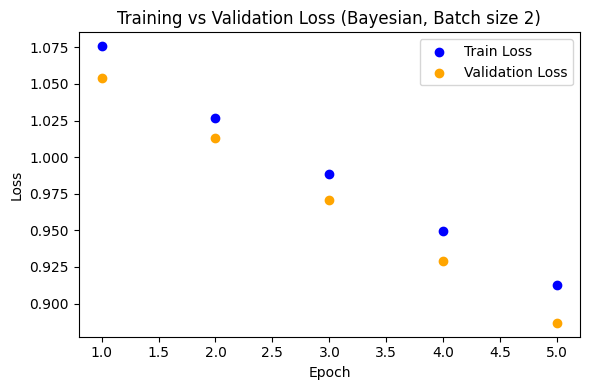


[Bayesian] Running with batch size = 4
Reloading Tuner from bayes_dir_bs_4/iris_bayes_bs_4/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Bayesian (batch_size=4) - Test Accuracy: 0.6667, F1: 0.5556


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


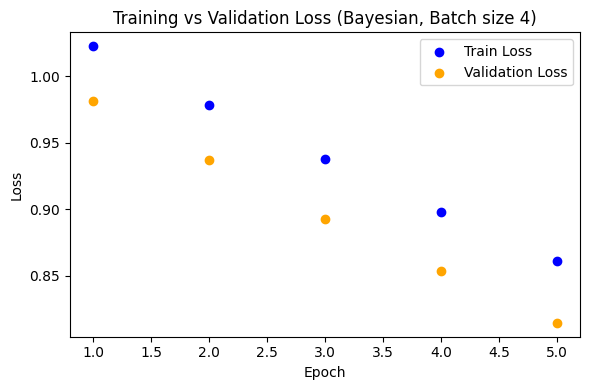


Bayesian optimization search complete.

Bayesian Optimization Results:
   batch_size  epochs  test_accuracy        f1               best_config  \
0           2       5       0.633333  0.540230  {'learning_rate': 0.001}   
1           4       5       0.666667  0.555556  {'learning_rate': 0.001}   

     method  
0  Bayesian  
1  Bayesian  


In [119]:
import keras_tuner as kt  # Import Keras Tuner for hyperparameter search
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For creating heatmaps and scatter plots
import pandas as pd  # For DataFrame operations
import tensorflow as tf  # TensorFlow for model building
from sklearn.metrics import f1_score  # For computing F1 score

results_bayes = []  # Initialize list to store Bayesian search results
ep = 5  # Set number of epochs (since we're not looping over epochs externally)

# Loop over the two batch sizes: 2 and 4
for bs in [2, 4]:
    print(f"\n[Bayesian] Running with batch size = {bs}")  # Print current batch size
    tuner_bayes = kt.BayesianOptimization(  # Initialize Bayesian tuner
        model_builder,  # Use our model builder function
        objective='val_accuracy',  # Optimize for validation accuracy
        max_trials=6,  # Try 6 hyperparameter combinations
        directory=f'bayes_dir_bs_{bs}',  # Directory to store tuner results
        project_name=f'iris_bayes_bs_{bs}'  # Unique project name
    )

    tuner_bayes.search(  # Run the hyperparameter search
        X_train, y_train_oh,  # Use training data (one-hot encoded)
        epochs=ep,  # Train each trial for 5 epochs
        validation_data=(X_val, y_val_oh),  # Use validation data
        batch_size=bs,  # Set current batch size
        verbose=1  # Display detailed output
    )

    best_hp_bayes = tuner_bayes.get_best_hyperparameters(num_trials=1)[0]  # Get best hyperparameters
    best_model_bayes = tuner_bayes.get_best_models(num_models=1)[0]  # Get best model from search
    test_loss, test_acc = best_model_bayes.evaluate(X_test, y_test_oh, verbose=0)  # Evaluate model on test data

    # Compute F1 score manually
    y_test_pred_prob = best_model_bayes.predict(X_test)  # Predict test probabilities
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Convert probabilities to predicted class labels
    y_test_true = np.argmax(y_test_oh, axis=1)  # Convert one-hot encoded true labels to integers
    f1_val = f1_score(y_test_true, y_test_pred, average='weighted')  # Compute weighted F1 score

    # Store results including F1 score
    results_bayes.append({
        'batch_size': bs,             # Save current batch size
        'epochs': ep,                 # Save number of epochs used
        'test_accuracy': test_acc,    # Save test accuracy
        'f1': f1_val,                 # Save computed F1 score
        'best_config': best_hp_bayes.values,  # Save best hyperparameter configuration
        'method': 'Bayesian'          # Indicate the method used
    })
    print(f"Bayesian (batch_size={bs}) - Test Accuracy: {test_acc:.4f}, F1: {f1_val:.4f}")  # Print performance

    # Retrain the best model to obtain training history for plotting
    best_model_retrained = tuner_bayes.hypermodel.build(best_hp_bayes)  # Build model with best hyperparameters
    history_bayes = best_model_retrained.fit(  # Retrain the model
        X_train, y_train_oh,  # Use training data
        validation_data=(X_val, y_val_oh),  # Use validation data
        epochs=ep,  # Train for 5 epochs
        batch_size=bs,  # Use current batch size
        verbose=0  # Silent training output
    )

    # Scatter plot for training vs. validation loss over epochs
    epochs_range = range(1, ep+1)  # Define epoch range from 1 to 5
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.scatter(list(epochs_range), history_bayes.history['loss'], label='Train Loss', color='blue')  # Plot training loss
    plt.scatter(list(epochs_range), history_bayes.history['val_loss'], label='Validation Loss', color='orange')  # Plot validation loss
    plt.title(f"Training vs Validation Loss (Bayesian, Batch size {bs})")  # Set plot title
    plt.xlabel("Epoch")  # Label x-axis
    plt.ylabel("Loss")  # Label y-axis
    plt.legend()  # Show legend
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot

print("\nBayesian optimization search complete.")  # Indicate that search is finished

# Create a DataFrame to compare results
df_bayes = pd.DataFrame(results_bayes)  # Convert results list to DataFrame
print("\nBayesian Optimization Results:")  # Print header for results table
print(df_bayes)  # Display the results table


**Create a table (Each row with a configuration and column with Accuracy and F1) for Grid, Random, Hyperband, and Bayesian search and compare their accuracy and F1**

In [145]:
import pandas as pd

# Assume results_grid is already defined from your manual grid search.
# Initialize missing lists if they are not defined.
try:
    results_random
except NameError:
    results_random = []

try:
    results_hb
except NameError:
    results_hb = []

try:
    results_bayes
except NameError:
    results_bayes = []

# Combine results from all methods
all_results = results_grid + results_random + results_hb + results_bayes
df_all = pd.DataFrame(all_results)

# Extract learning_rate and tuned epochs from best_config
df_all['learning_rate'] = df_all['best_config'].apply(lambda x: x.get('learning_rate'))
df_all['tuned_epochs'] = df_all['best_config'].apply(lambda x: x.get('tuner/epochs'))

# Ensure the 'epochs' column is complete: fill missing values with tuned_epochs
df_all['epochs'] = df_all['epochs'].fillna(df_all['tuned_epochs'])

# Create the final table with all relevant hyperparameters and performance metrics
df_table = df_all[['method', 'batch_size', 'epochs', 'learning_rate', 'test_accuracy', 'f1']]
print("Combined Hyperparameter Optimization Results:")
print(df_table)


Combined Hyperparameter Optimization Results:
          method  batch_size  epochs  learning_rate  test_accuracy        f1
0           Grid           2       1        0.00100       0.333333  0.166667
1           Grid           2       3        0.00100       0.366667  0.240786
2           Grid           2       5        0.00100       0.666667  0.555556
3           Grid           2       1        0.00001       0.333333  0.166667
4           Grid           2       3        0.00001       0.333333  0.166667
5           Grid           2       5        0.00001       0.366667  0.231546
6           Grid           4       1        0.00100       0.000000  0.000000
7           Grid           4       3        0.00100       0.666667  0.555556
8           Grid           4       5        0.00100       0.666667  0.555556
9           Grid           4       1        0.00001       0.000000  0.000000
10          Grid           4       3        0.00001       0.000000  0.000000
11          Grid           4  

**Combine Hyperband & Bayesian Results**


##**Describe the performance for each hyperparameter combination over accuracy and F1.**

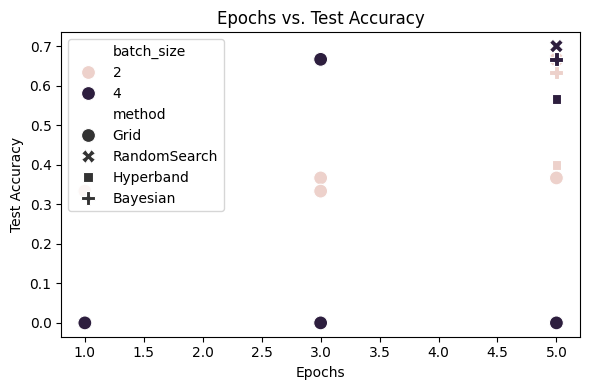

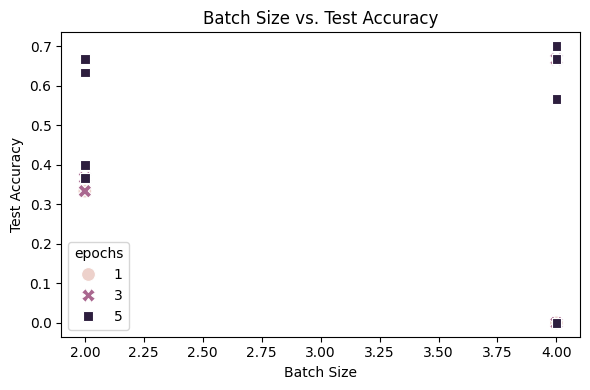

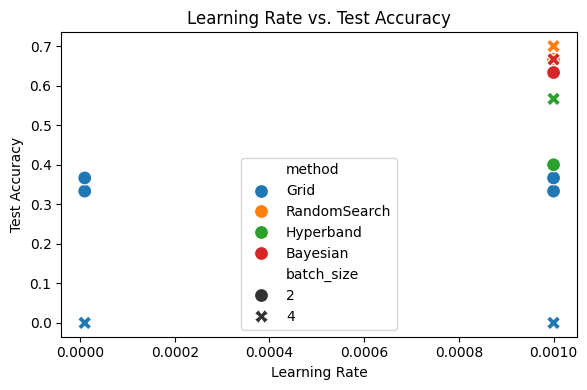

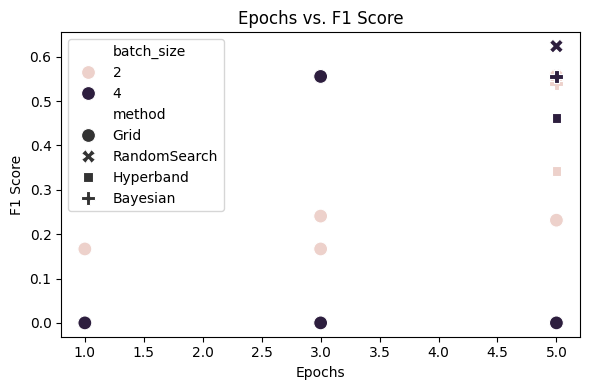

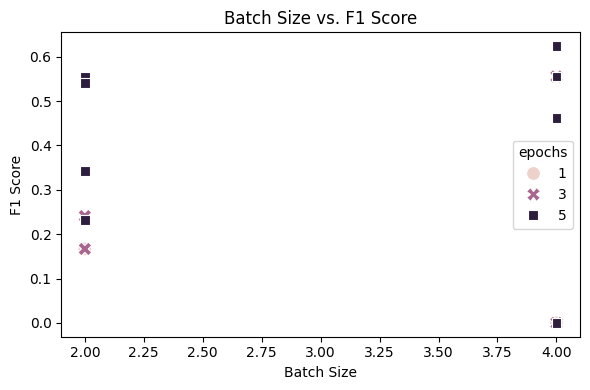

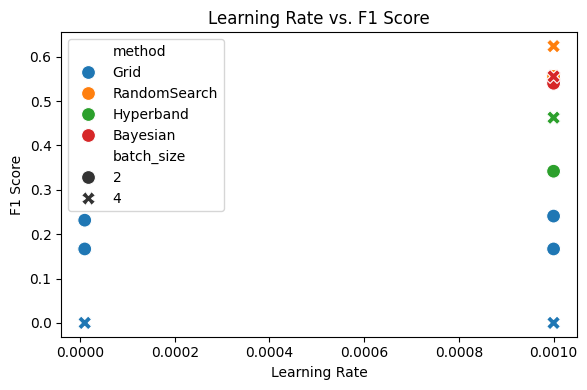

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure learning_rate is properly extracted before plotting (if needed)
df_all['learning_rate'] = df_all.get('best_learning_rate', df_all.get('learning_rate'))

# 1. Epochs vs. Test Accuracy
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='epochs', y='test_accuracy', hue='batch_size', style='method', s=100)
plt.title('Epochs vs. Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# 2. Batch Size vs. Test Accuracy
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='batch_size', y='test_accuracy', hue='epochs', style='epochs', s=100)
plt.title('Batch Size vs. Test Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# 3. Learning Rate vs. Test Accuracy
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='learning_rate', y='test_accuracy', hue='method', style='batch_size', s=100)
plt.title('Learning Rate vs. Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# 4. Epochs vs. F1 Score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='epochs', y='f1', hue='batch_size', style='method', s=100)
plt.title('Epochs vs. F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

# 5. Batch Size vs. F1 Score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='batch_size', y='f1', hue='epochs', style='epochs', s=100)
plt.title('Batch Size vs. F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

# 6. Learning Rate vs. F1 Score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='learning_rate', y='f1', hue='method', style='batch_size', s=100)
plt.title('Learning Rate vs. F1 Score')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()


##**Plots for the training vs validation loss for each hyperparameter configuration**


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


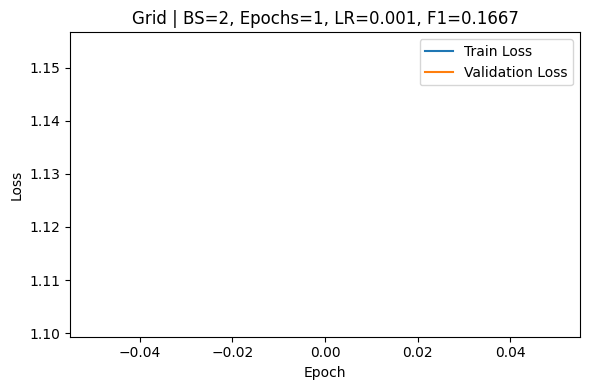

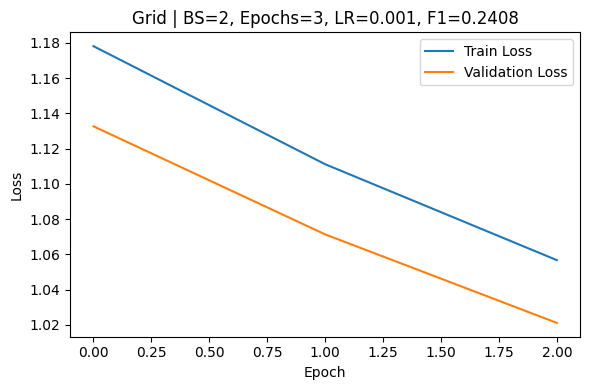

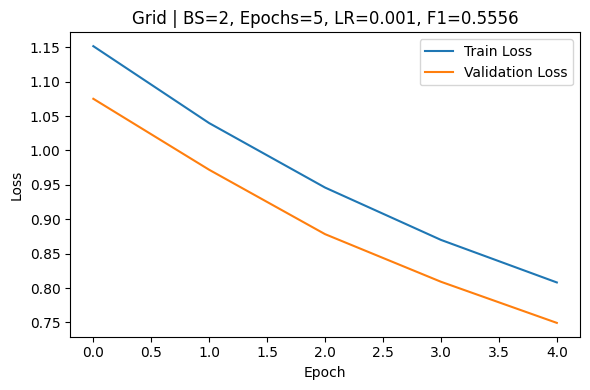

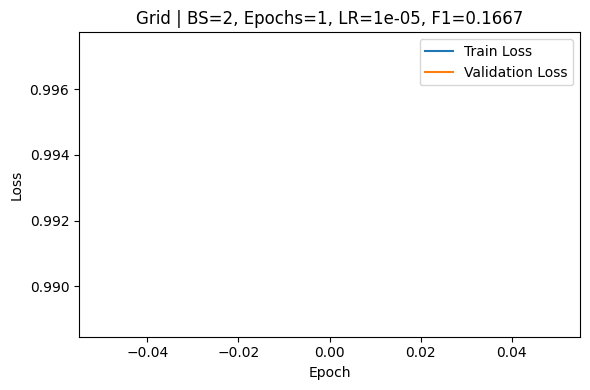

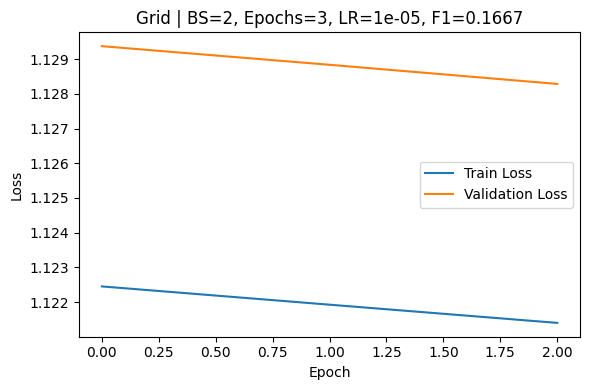

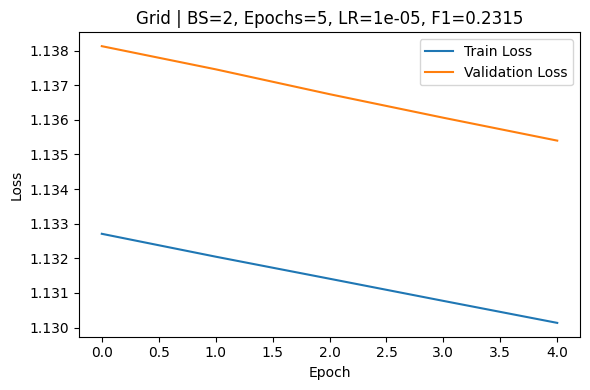

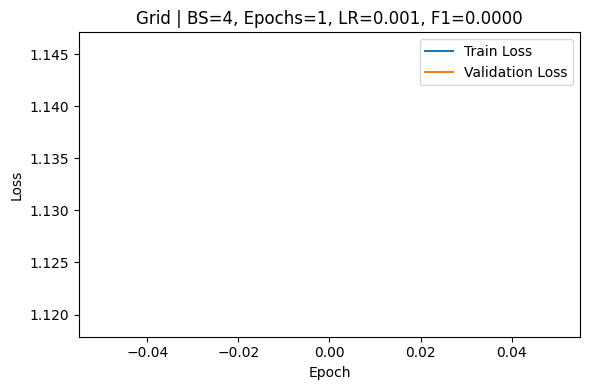

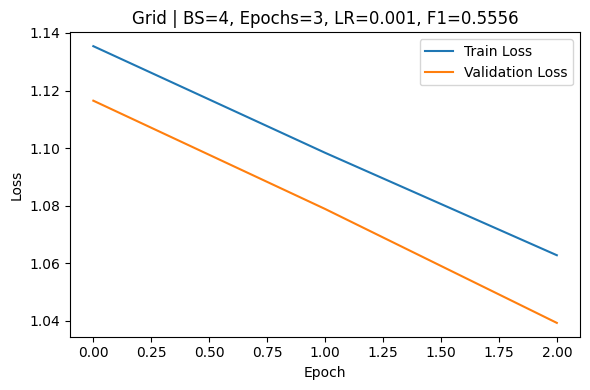

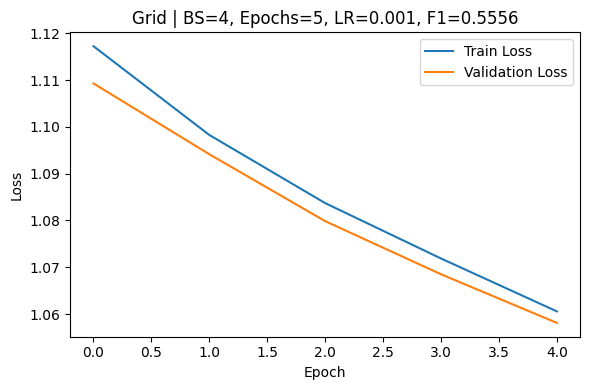

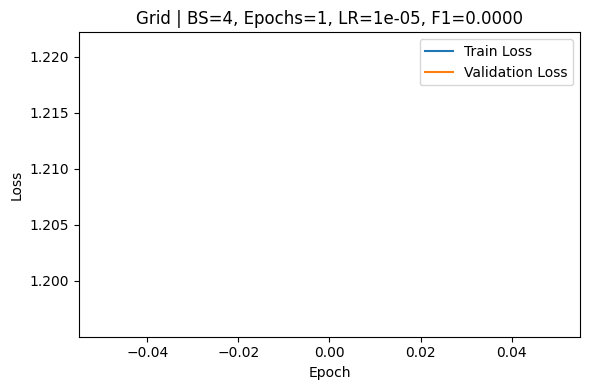

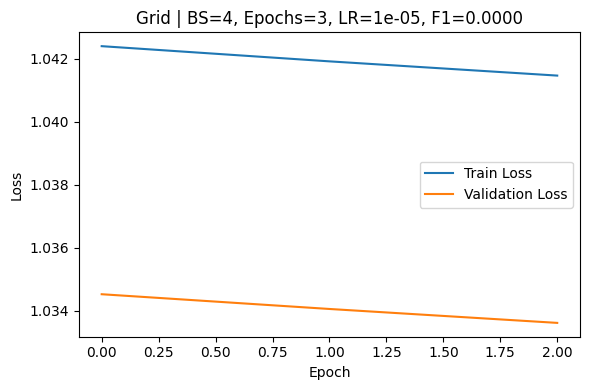

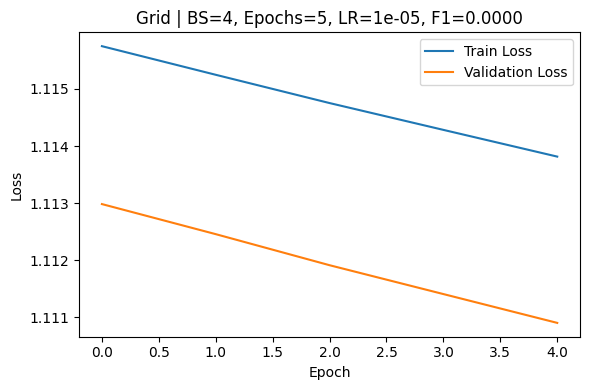

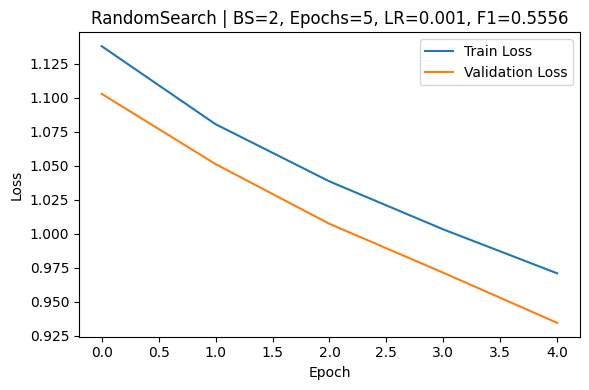

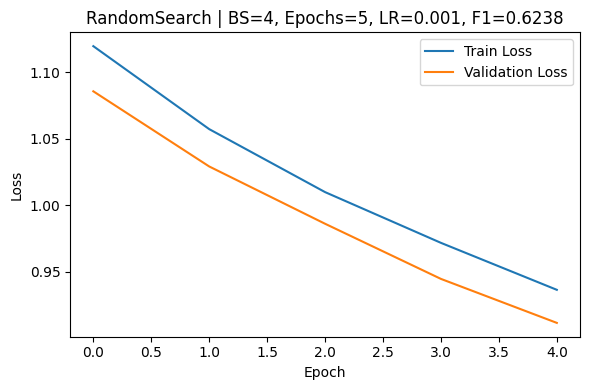

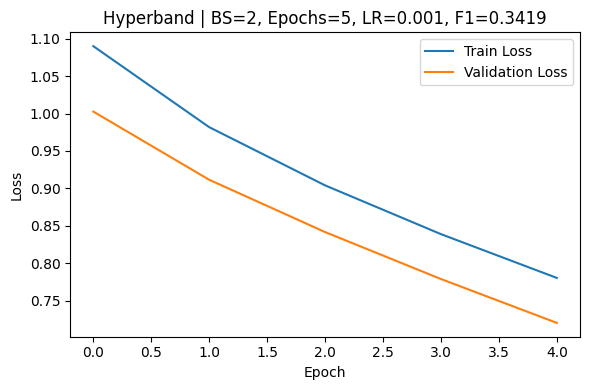

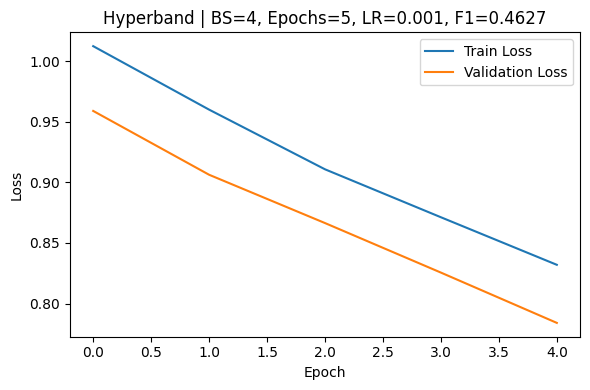

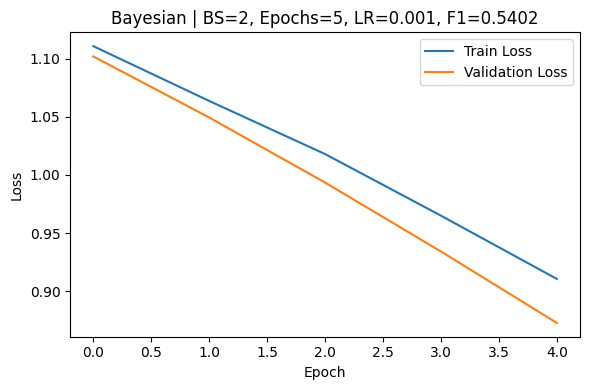

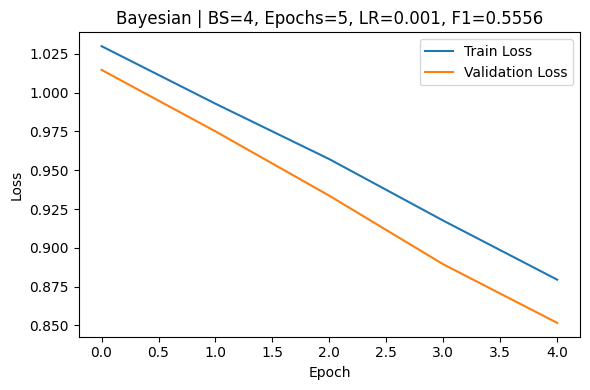

In [149]:
import matplotlib.pyplot as plt

# Loop through each configuration in the combined results DataFrame
for idx, row in df_all.iterrows():
    # Extract hyperparameters from the row
    bs = row['batch_size']           # Batch size
    ep = row['epochs']               # Number of epochs
    lr = row['learning_rate']        # Learning rate
    method = row['method']           # Tuning method (Grid, Random, Hyperband, Bayesian)
    f1_val = row['f1']               # F1 score from evaluation

    # Re-train the model using the hyperparameters to obtain the training history
    model = create_model(lr)  # Build the model with the given learning rate
    history = model.fit(
        X_train, y_train,  # Training data
        validation_data=(X_val, y_val),  # Validation data
        epochs=ep,        # Number of epochs from the configuration
        batch_size=bs,    # Batch size from the configuration
        verbose=0         # Silent training output
    )

    # Plot training and validation loss curves
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{method} | BS={bs}, Epochs={ep}, LR={lr}, F1={f1_val:.4f}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()
